# Задача классификации. Метод K ближайших соседей.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors
import sklearn.metrics as metrics
import sklearn.datasets as datasets

Решаем задачу классификации цветков ириса.

In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

Создадим экземпляр класса.

In [ ]:
knn_u = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_d = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
knn_u.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_d.fit(X, Y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
Y_u = knn_u.predict(X)

In [ ]:
Y_d = knn_d.predict(X)

In [ ]:
print('KNN uniform:', 100*metrics.accuracy_score(Y, Y_u))

KNN uniform: 96.0


In [ ]:
print('KNN distance:', 100*metrics.accuracy_score(Y, Y_d))

KNN distance: 100.0


In [ ]:
errors_ui = []
for k, yk in enumerate(Y_u):
    if yk != Y[k]:
        errors_ui.append(k)
print(errors_ui)

[70, 72, 83, 106, 119, 133]


In [ ]:
errors_di = []
for k, yk in enumerate(Y_d):
    if yk != Y[k]:
        errors_di.append(k)
print(errors_di)

[]


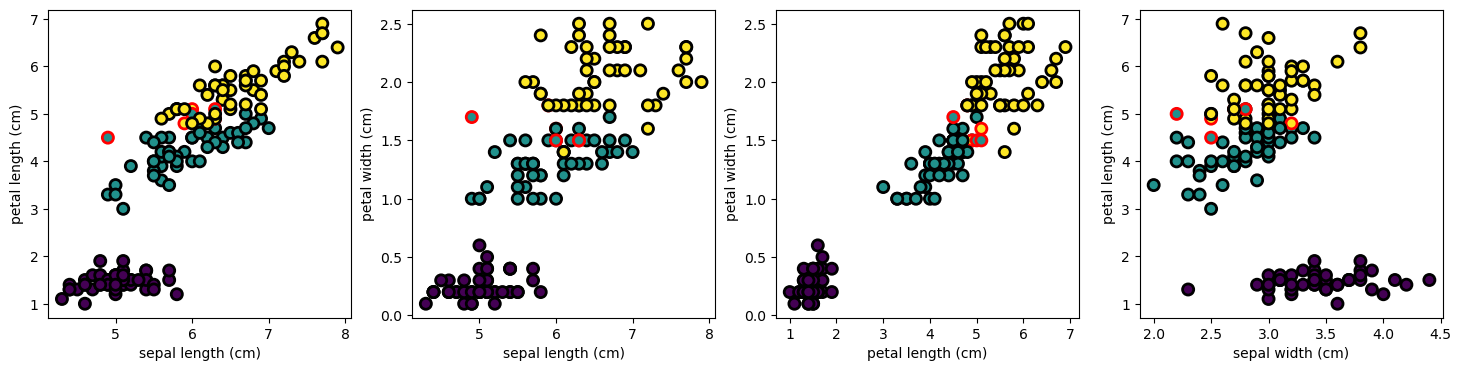

In [ ]:
edge_colors = 150 * ['k']
for k in errors_ui:
    edge_colors[k] = 'r'

attr_names = iris.feature_names

attr_pairs = [(0,2), (0,3), (2,3), (1,2)]

plt.figure(figsize=(18,4))
for k, ij in enumerate(attr_pairs):
    i, j = ij
    plt.subplot(1, 4, k+1)
    plt.scatter(X[:,i], X[:,j], c=Y_u, edgecolors=edge_colors, s=64, linewidth=2.0)
    plt.xlabel(attr_names[i])
    plt.ylabel(attr_names[j])
plt.show()

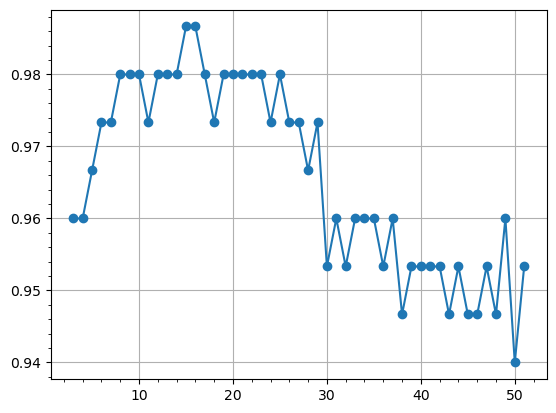

In [ ]:
acuracy_u = []

for n in range(3, 52):
    _knn = neighbors.KNeighborsClassifier(n_neighbors=n, weights='uniform')
    _knn.fit(X, Y)
    _Y = _knn.predict(X)
    ac = metrics.accuracy_score(_Y, Y)
    acuracy_u.append(ac)

plt.plot(range(3, 52), acuracy_u, marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()


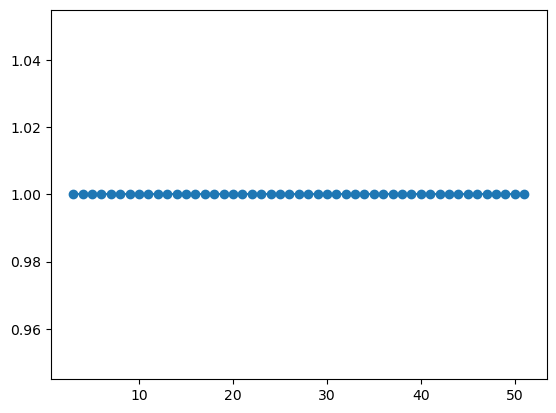

In [ ]:
acuracy_d = []

for n in range(3, 52):
    _knn = neighbors.KNeighborsClassifier(n_neighbors=n, weights='distance')
    _knn.fit(X, Y)
    _Y = _knn.predict(X)
    ac = metrics.accuracy_score(_Y, Y)
    acuracy_d.append(ac)

plt.plot(range(3, 52), acuracy_d, marker='o')
plt.show()


In [ ]:
import sklearn.model_selection as model_selection

In [ ]:
cv = model_selection.StratifiedKFold(5, shuffle=True)

train: 0.97 0.008498365855987945
control: 0.9666666666666668 0.02108185106778919


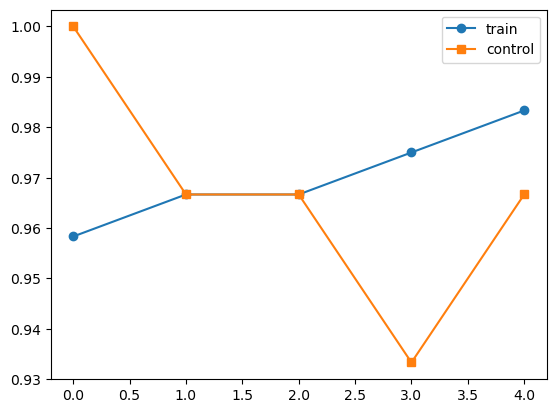

In [ ]:
accuracy_t = []
accuracy_c = []
for I_t, I_c in cv.split(X, Y):
    X_t, X_c = X[I_t], X[I_c]
    Y_t, Y_c = Y[I_t], Y[I_c]
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
    knn.fit(X_t, Y_t)
    Y_t_p = knn.predict(X_t)
    Y_c_p = knn.predict(X_c)
    accuracy_t.append(metrics.accuracy_score(Y_t_p, Y_t))
    accuracy_c.append(metrics.accuracy_score(Y_c_p, Y_c))

print('train:', np.mean(accuracy_t), np.std(accuracy_t))
print('control:', np.mean(accuracy_c), np.std(accuracy_c))

plt.plot(range(5), accuracy_t, marker='o', label='train')
plt.plot(range(5), accuracy_c, marker='s', label='control')
plt.legend()
plt.show()


In [ ]:
cv2 = model_selection.StratifiedShuffleSplit(22, train_size=0.8)

train: 0.972348484848485 0.008097559972133298
control: 0.9681818181818179 0.025578701539597168


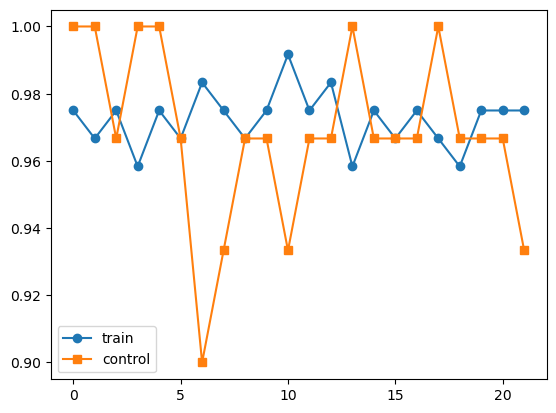

In [ ]:
accuracy_t = []
accuracy_c = []
for I_t, I_c in cv2.split(X, Y):
    X_t, X_c = X[I_t], X[I_c]
    Y_t, Y_c = Y[I_t], Y[I_c]
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
    knn.fit(X_t, Y_t)
    Y_t_p = knn.predict(X_t)
    Y_c_p = knn.predict(X_c)
    accuracy_t.append(metrics.accuracy_score(Y_t_p, Y_t))
    accuracy_c.append(metrics.accuracy_score(Y_c_p, Y_c))

print('train:', np.mean(accuracy_t), np.std(accuracy_t))
print('control:', np.mean(accuracy_c), np.std(accuracy_c))

plt.plot(range(22), accuracy_t, marker='o', label='train')
plt.plot(range(22), accuracy_c, marker='s', label='control')
plt.legend()
plt.show()


In [ ]:
cv3 = model_selection.StratifiedShuffleSplit(22, train_size=0.80)

train: 1.0 0.0
control: 0.9742424242424241 0.024478021850611372


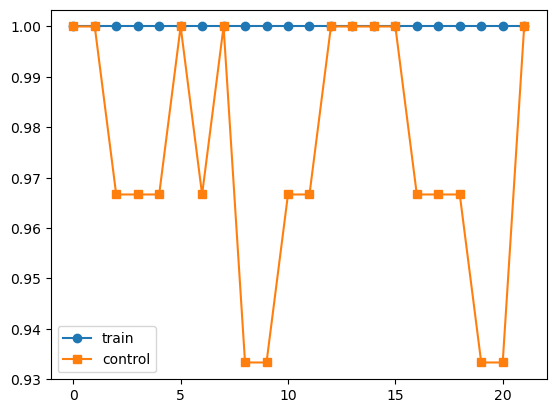

In [ ]:
accuracy_t = []
accuracy_c = []
for I_t, I_c in cv3.split(X, Y):
    X_t, X_c = X[I_t], X[I_c]
    Y_t, Y_c = Y[I_t], Y[I_c]
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
    knn.fit(X_t, Y_t)
    Y_t_p = knn.predict(X_t)
    Y_c_p = knn.predict(X_c)
    accuracy_t.append(metrics.accuracy_score(Y_t_p, Y_t))
    accuracy_c.append(metrics.accuracy_score(Y_c_p, Y_c))

print('train:', np.mean(accuracy_t), np.std(accuracy_t))
print('control:', np.mean(accuracy_c), np.std(accuracy_c))

plt.plot(range(22), accuracy_t, marker='o', label='train')
plt.plot(range(22), accuracy_c, marker='s', label='control')
plt.legend()
plt.show()


In [ ]:
# ### Задача 9

# Обучить алгоритм классификации (kNN) по методу K (K=5) ближайших соседей с учетом и без учета росстояний на наборе данных [wine](https://archive.ics.uci.edu/ml/datasets/Wine), предварительно приведя значения признаков к значениями, сопостовимым по масштабам.
# Определить к каких строках исходных данных произошли ошибки. Оценить относительное число правильных ответов (sklearn.metrics.accuracy_score).
# Изобразить в проекциях по парам атрибутов классы объектов, используя диаграммы рассеяния (plt.scatter), результаты классификации. Пары атрибутов выбрать, такие чтобы исходно заданнаяя классификация (разделение на классы) была более отчетливой.

# Оценить количество соседей (`n_neighbours`), которое является оптимальным для корректности функционирования алгоритма на обучающей выборке.

# Оценить методом скользящего контроля (StratifiedKFold и StratifiedShuffleSplit) является ли обученные алгоритмы (n_neighbors=5) переобученными при условии, что 80% данных используется для обучения, а 20% - для контроля.

### Задача 9

Обучить алгоритм классификации (kNN) по методу K (K=5) ближайших соседей с учетом и без учета росстояний на наборе данных `wine`, предварительно приведя значения признаков к значениями, сопостовимым по масштабам.
Определить к каких строках исходных данных произошли ошибки. Оценить относительное число правильных ответов (sklearn.metrics.accuracy_score).
Изобразить в проекциях по парам атрибутов классы объектов, используя диаграммы рассеяния (plt.scatter), результаты классификации. Пары атрибутов выбрать, такие чтобы исходно заданнаяя классификация (разделение на классы) была более отчетливой.